In [263]:
import cv2
import matplotlib.pyplot as plt

In [295]:
image = cv2.imread('Test_happy.jpg')

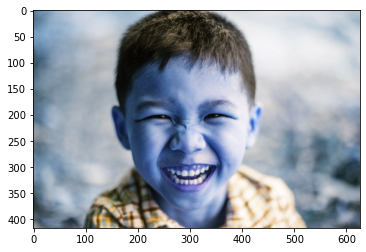

In [296]:
plt.imshow(image) #BGR

In [297]:
image_Org =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

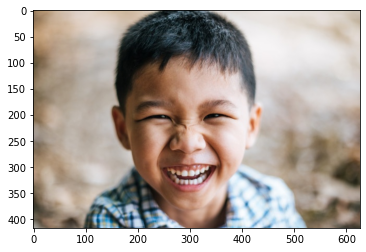

In [298]:
plt.imshow(image_Org)

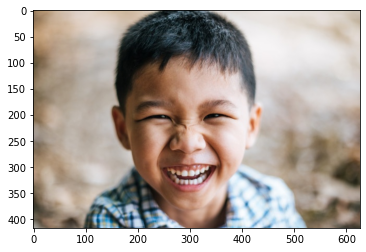

In [299]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

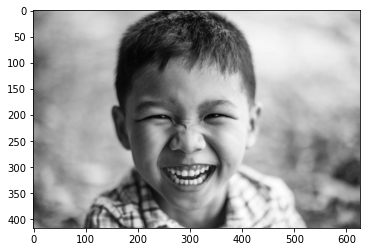

In [300]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY),cmap='gray')

In [301]:
#!pip install deepface

In [302]:
from deepface import DeepFace

In [303]:
#result = DeepFace.verify("Test_happy.jpg", db_path = "OneDrive/Desktop/CSCE5222/ProjectFE")

In [304]:
predictions = DeepFace.analyze(image_Org)

Action: race: 100%|█████████████████████████████████████████████| 4/4 [00:01<00:00,  2.83it/s]


In [305]:
predictions

{'emotion': {'angry': 14.536108319295444,
  'disgust': 0.0012242433153587806,
  'fear': 85.2243584661911,
  'happy': 0.06475956369119151,
  'sad': 0.16488879556373304,
  'surprise': 0.008570882640381323,
  'neutral': 9.0654156685761e-05},
 'dominant_emotion': 'fear',
 'region': {'x': 173, 'y': 99, 'w': 260, 'h': 260},
 'age': 23,
 'gender': 'Man',
 'race': {'asian': 99.8949944972992,
  'indian': 0.0013275567653181497,
  'black': 2.450145473176235e-05,
  'white': 0.009259177750209346,
  'middle eastern': 1.43515510586667e-06,
  'latino hispanic': 0.09439426357857883},
 'dominant_race': 'asian'}

In [306]:
predictions.keys()

dict_keys(['emotion', 'dominant_emotion', 'region', 'age', 'gender', 'race', 'dominant_race'])

In [307]:
predictions.values()

dict_values([{'angry': 14.536108319295444, 'disgust': 0.0012242433153587806, 'fear': 85.2243584661911, 'happy': 0.06475956369119151, 'sad': 0.16488879556373304, 'surprise': 0.008570882640381323, 'neutral': 9.0654156685761e-05}, 'fear', {'x': 173, 'y': 99, 'w': 260, 'h': 260}, 23, 'Man', {'asian': 99.8949944972992, 'indian': 0.0013275567653181497, 'black': 2.450145473176235e-05, 'white': 0.009259177750209346, 'middle eastern': 1.43515510586667e-06, 'latino hispanic': 0.09439426357857883}, 'asian'])

In [308]:
dominant_emotion=predictions['dominant_emotion']

In [309]:
s=predictions.get("dominant_emotion")

In [310]:
print(s)

fear


In [311]:
Emotions_perc = predictions['emotion']

In [312]:
percentage = Emotions_perc['fear']

In [313]:
Emotions_perc[dominant_emotion]

85.2243584661911

In [314]:
# Load the classifier and create a cascade object for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

In [315]:
#detected_faces = face_cascade.detectMultiScale(image)

In [316]:
#!pip install deepface

In [317]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [318]:
faces = face_cascade.detectMultiScale(gray,1.1,4)

In [319]:
for(x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w, y+w),(0,255,0),2)

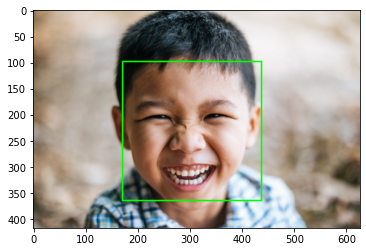

In [320]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [321]:
font = cv2.FONT_HERSHEY_SIMPLEX


In [322]:
cv2.putText(image,predictions['dominant_emotion'] +'='+ str(round(Emotions_perc['fear']))+'%',(0,200),font,1,(0,255,0),2,cv2.LINE_4);

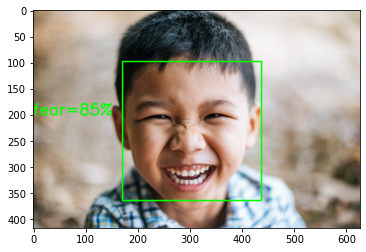

In [323]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [324]:
cv2.putText(image,predictions['dominant_emotion'] ,(100,200),font,1,(255,0,0),2,cv2.LINE_4);

#DEEP FACE EXPERIMENTS

In [331]:
#ref = https://pypi.org/project/deepface/

In [327]:
result = DeepFace.verify("Test1.jpg", "Test2.jpg")

In [328]:
#verifying whether there is a match in two images
result

{'verified': False,
 'distance': 0.6734907073157829,
 'max_threshold_to_verify': 0.4,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine'}

In [339]:
#models in deepface
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]

In [340]:
result = DeepFace.verify("Test1.jpg", "Test2.jpg", model_name = models[1])

facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: C:\Users\gayat\.deepface\weights\facenet_weights.h5
100%|████████████████████████████████████████████████████| 92.2M/92.2M [00:02<00:00, 39.3MB/s]


In [341]:
result

{'verified': False,
 'distance': 1.13019278678224,
 'max_threshold_to_verify': 0.4,
 'model': 'Facenet',
 'similarity_metric': 'cosine'}

In [348]:
result = DeepFace.analyze("Test1.jpg",actions = ['emotion','dominant_emotion'])

Action: race: 100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  7.42it/s]


In [349]:
result

{'emotion': {'angry': 2.5502660605525307e-05,
  'disgust': 1.4720172303306356e-08,
  'fear': 0.0030060029530432075,
  'happy': 99.97674822807312,
  'sad': 0.005287384556140751,
  'surprise': 0.0048039590183179826,
  'neutral': 0.010130854207091033},
 'dominant_emotion': 'happy',
 'region': {'x': 217, 'y': 65, 'w': 120, 'h': 120},
 'age': 28,
 'gender': 'Woman',
 'race': {'asian': 53.39159965515137,
  'indian': 9.186326712369919,
  'black': 12.196622788906097,
  'white': 2.3233046755194664,
  'middle eastern': 1.0926094837486744,
  'latino hispanic': 21.80953472852707},
 'dominant_race': 'asian'}

In [350]:
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']


In [366]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]

In [351]:
detected_face = DeepFace.detectFace("Test1.jpg", detector_backend = backends[4])

retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: C:\Users\gayat\.deepface\weights\retinaface.h5
100%|██████████████████████████████████████████████████████| 119M/119M [00:04<00:00, 27.2MB/s]


In [353]:
#face detection and alignment
detected_face = DeepFace.detectFace("Test1.jpg", detector_backend = backends[4])

#face verification
obj = DeepFace.verify("Test1.jpg", "Test2.jpg", detector_backend = backends[4])

#face recognition
#df = DeepFace.find(img_path = "Test1.jpg", db_path = "ProjectFE", detector_backend = backends[4])

#facial analysis
demography = DeepFace.analyze("Test1.jpg", detector_backend = backends[4])

Action: race: 100%|█████████████████████████████████████████████| 4/4 [00:05<00:00,  1.32s/it]


In [355]:
#obj

{'verified': False,
 'distance': 0.5124928439641872,
 'max_threshold_to_verify': 0.4,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine'}

In [356]:
#demography

{'emotion': {'angry': 0.0019102216585345437,
  'disgust': 1.3866471109625355e-05,
  'fear': 0.0017425241041547086,
  'happy': 97.88785564231011,
  'sad': 1.3119112550861391,
  'surprise': 0.0006264364320069381,
  'neutral': 0.7959454794791626},
 'dominant_emotion': 'happy',
 'region': {'x': 233, 'y': 64, 'w': 94, 'h': 130},
 'age': 27,
 'gender': 'Woman',
 'race': {'asian': 50.816452503204346,
  'indian': 11.580947041511536,
  'black': 10.29304414987564,
  'white': 3.831532970070839,
  'middle eastern': 1.9569497555494308,
  'latino hispanic': 21.52107059955597},
 'dominant_race': 'asian'}

In [357]:
demography = DeepFace.analyze("Test1.jpg", detector_backend = backends[4])

Action: race: 100%|█████████████████████████████████████████████| 4/4 [00:04<00:00,  1.23s/it]


In [358]:
demography

{'emotion': {'angry': 0.0019102216585345437,
  'disgust': 1.3866471109625355e-05,
  'fear': 0.0017425241041547086,
  'happy': 97.88785564231011,
  'sad': 1.3119112550861391,
  'surprise': 0.0006264364320069381,
  'neutral': 0.7959454794791626},
 'dominant_emotion': 'happy',
 'region': {'x': 233, 'y': 64, 'w': 94, 'h': 130},
 'age': 27,
 'gender': 'Woman',
 'race': {'asian': 50.816452503204346,
  'indian': 11.580947041511536,
  'black': 10.29304414987564,
  'white': 3.831532970070839,
  'middle eastern': 1.9569497555494308,
  'latino hispanic': 21.52107059955597},
 'dominant_race': 'asian'}

In [360]:
demography = DeepFace.analyze("Test1.jpg", detector_backend = backends[0])

Action: race: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.41it/s]


In [361]:
demography

{'emotion': {'angry': 2.5502660605525307e-05,
  'disgust': 1.4720172303306356e-08,
  'fear': 0.0030060029530432075,
  'happy': 99.97674822807312,
  'sad': 0.005287384556140751,
  'surprise': 0.0048039590183179826,
  'neutral': 0.010130854207091033},
 'dominant_emotion': 'happy',
 'region': {'x': 217, 'y': 65, 'w': 120, 'h': 120},
 'age': 28,
 'gender': 'Woman',
 'race': {'asian': 53.39159965515137,
  'indian': 9.186326712369919,
  'black': 12.196622788906097,
  'white': 2.3233046755194664,
  'middle eastern': 1.0926094837486744,
  'latino hispanic': 21.80953472852707},
 'dominant_race': 'asian'}

In [364]:
demography = DeepFace.analyze("Test1.jpg", detector_backend = backends[3])

Action: race: 100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.79it/s]


In [365]:
demography

{'emotion': {'angry': 3.3658917431012014e-06,
  'disgust': 1.917883768465245e-08,
  'fear': 0.00017912344674186897,
  'happy': 99.74184036254883,
  'sad': 0.1350629609078169,
  'surprise': 1.1488235429624183e-05,
  'neutral': 0.1229020650498569},
 'dominant_emotion': 'happy',
 'region': {'x': 228, 'y': 62, 'w': 94, 'h': 134},
 'age': 27,
 'gender': 'Woman',
 'race': {'asian': 31.61810259603231,
  'indian': 10.745240212054227,
  'black': 6.019841534514244,
  'white': 11.670877883329643,
  'middle eastern': 7.598354506688773,
  'latino hispanic': 32.347579914619935},
 'dominant_race': 'latino hispanic'}

In [378]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [379]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')